![logo pandas](https://www.interactivechaos.com/sites/default/files/inline-images/imagen_presentacion_tutorial.png)

Pandas es una biblioteca de Python para el análisis y la manipulación de datos.
Es muy rápido debido a que trabaja sobre arrays de NumPy.

Es perfecto para trabajar con datos tabulares como los obtenidos de bases de datos relacionales o de hojas de cálculo.


## Series
Estructura de datos unidimensional.

### Carga de paquetes

In [281]:
import numpy  as np
import pandas as pd

### Inicializaciones

In [282]:
etiquetas = ['a','b','c']
lista_datos = [10,20,30]
array_datos = np.array(lista_datos)
diccio_datos = {  'a':10,
                  'b':20,
                  'c':30 }

print ("Etiquetas:", etiquetas)
print("Datos:", lista_datos)
print("Diccionario:", diccio_datos)

Etiquetas: ['a', 'b', 'c']
Datos: [10, 20, 30]
Diccionario: {'a': 10, 'b': 20, 'c': 30}


### Creación Series (clase de Pandas)
* A partir de datos numéricos solo.
* A partir de datos numéricos y las etiquetas correspondientes (etiquetas de fila).
* A partir de un array de NumPy.
* Usando sólo un diccionario.

In [283]:
pd.Series(data=lista_datos)  # lista_datos = [10,20,30]

0    10
1    20
2    30
dtype: int64

In [284]:
# etiquetas = ['a','b','c']
# lista_datos = [10,20,30]
pd.Series(data=lista_datos, index=etiquetas) # índice: etiquetas para las filas

a    10
b    20
c    30
dtype: int64

In [285]:
# Sin nombre en los parámetros porque van en el orden adecuado:
# etiquetas = ['a','b','c']
# array_datos = np.array(lista_datos)
pd.Series(array_datos, etiquetas) # puede haber valores de los índices repetidos

a    10
b    20
c    30
dtype: int64

In [286]:
# diccio_datos = {'a':10,'b':20,'c':30}
pd.Series(diccio_datos) # Datos a partir de un diccionario: claves -> columnas

a    10
b    20
c    30
dtype: int64

### Tipos de datos que puede manejar Pandas

In [287]:
print ("\nDatos numéricos\n",'-'*25, sep='')
print(pd.Series(array_datos))
print ("\nDatos de tipo texto (strings)\n",'-'*20, sep='')
print(pd.Series(etiquetas))
print ("\nFunciones\n",'-'*20, sep='')
print(pd.Series(data=[sum,print,len]))
print ("\nObjetos (de un diccionario)\n",'-'*40, sep='')
print(pd.Series(data=[diccio_datos.keys, diccio_datos.items, diccio_datos.values]))


Datos numéricos
-------------------------
0    10
1    20
2    30
dtype: int64

Datos de tipo texto (strings)
--------------------
0    a
1    b
2    c
dtype: object

Funciones
--------------------
0      <built-in function sum>
1    <built-in function print>
2      <built-in function len>
dtype: object

Objetos (de un diccionario)
----------------------------------------
0    <built-in method keys of dict object at 0x7f81...
1    <built-in method items of dict object at 0x7f8...
2    <built-in method values of dict object at 0x7f...
dtype: object


### Indexado y segmentación

In [288]:
serie1 = pd.Series([1,2,3,4],['Santiago', 'Ourense', 'A Coruña', 'Lugo'])
serie2 = pd.Series([1,2,5,4],['Santiago', 'Ourense', 'Vigo', 'Lugo'])

print ("\nIndexando por el nombre del item/objeto (identificador string)\n",'-'*56, sep='')
print("Valor para Santiago en serie1:", serie1['Santiago'])
print("Valor para Lugo en serie1:", serie1['Lugo'])
print("Valor para Vigo en serie2:", serie2['Vigo'])

print ("\nIndexando por la posición en la serie\n",'-'*52, sep='')
print("Valor para Santiago en serie1:", serie1[0])
print("Valor para Lugo en serie1:", serie1[3])
print("Valor para Vigo en serie2:", serie2[2])

print ("\nIndexando con un rango\n",'-'*25, sep='')
print ("Valor para Ourense, A Coruña, y Lugo en serie1:\n", serie1[1:4], sep='')
print ("\nValor desde Ourense en la serie1:\n", serie1["Ourense"::], sep='')


Indexando por el nombre del item/objeto (identificador string)
--------------------------------------------------------
Valor para Santiago en serie1: 1
Valor para Lugo en serie1: 4
Valor para Vigo en serie2: 5

Indexando por la posición en la serie
----------------------------------------------------
Valor para Santiago en serie1: 1
Valor para Lugo en serie1: 4
Valor para Vigo en serie2: 5

Indexando con un rango
-------------------------
Valor para Ourense, A Coruña, y Lugo en serie1:
Ourense     2
A Coruña    3
Lugo        4
dtype: int64

Valor desde Ourense en la serie1:
Ourense     2
A Coruña    3
Lugo        4
dtype: int64


### Combinando series con índices comunes

In [289]:
serie1 = pd.Series([1,2,3,4],['Santiago', 'Ourense', 'A Coruña', 'Lugo'])
serie2 = pd.Series([1,2,5,4],['Santiago', 'Ourense', 'Vigo', 'Lugo'])
serie3 = serie1+serie2

print ("\nResultado de sumar ambas series:\n",'-'*32, sep='')
print(serie3) # suma donde hay nombres (índices) iguales y asigna NaN (Not a Number) donde faltan índices
print ("\nResultado de multiplicar ambas series:\n",'-'*38, sep='') # aplica el mismo criterio para emparejar
print (serie1*serie2)
print ("\nResultado cuando se combinan varias operaciones matemáticas:\n",'-'*60, sep='')
print (np.exp(serie1)+np.log10(serie2))


Resultado de sumar ambas series:
--------------------------------
A Coruña    NaN
Lugo        8.0
Ourense     4.0
Santiago    2.0
Vigo        NaN
dtype: float64

Resultado de multiplicar ambas series:
--------------------------------------
A Coruña     NaN
Lugo        16.0
Ourense      4.0
Santiago     1.0
Vigo         NaN
dtype: float64

Resultado cuando se combinan varias operaciones matemáticas:
------------------------------------------------------------
A Coruña          NaN
Lugo        55.200210
Ourense      7.690086
Santiago     2.718282
Vigo              NaN
dtype: float64


# DataFrame
Estructura de datos tabular

In [290]:
from numpy.random import randn

## Creación y acceso a un DataFrame
* Indexado
* Añadir y eliminar filas y columnas
* Subconjuntos de un DataFrame

![estructura dataframe](https://www.cdn.geeksforgeeks.org/wp-content/uploads/creating_dataframe1.png)

### Creación del DataFrame

In [291]:
np.random.seed(101)  # misma semilla -> misma secuencia aleatoria (experimento repetible)
datos_matriz = np.random.randn(5,4)  # distribución Normal(0,1)
etiquetas_filas    = ['A','B','C','D','E']
cabeceras_columnas = ['W','X','Y','Z']

df = pd.DataFrame(data=datos_matriz, index=etiquetas_filas, columns=cabeceras_columnas)
print("\nInformación en el DataFrame\n" + '-'*41)
print(df)


Información en el DataFrame
-----------------------------------------
          W         X         Y         Z
A  2.706850  0.628133  0.907969  0.503826
B  0.651118 -0.319318 -0.848077  0.605965
C -2.018168  0.740122  0.528813 -0.589001
D  0.188695 -0.758872 -0.933237  0.955057
E  0.190794  1.978757  2.605967  0.683509


In [292]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Tablas dinámicas (*pivot tables*)

In [293]:
datos = {'A':['2021','2022','2022','2021','2021','2022','2021'],
         'B':['S1','S2','S1','S2','S1','S1','S2'],
         'C':['altas','bajas','bajas','altas','bajas','altas','bajas'],
         'D':[5,7,4,7,9,2,5]}

df2 = pd.DataFrame(datos)
df2

,A,B,C,D
0,2021,S1,altas,5
1,2022,S2,bajas,7
2,2022,S1,bajas,4
3,2021,S2,altas,7
4,2021,S1,bajas,9
5,2022,S1,altas,2
6,2021,S2,bajas,5


In [294]:
# 'A' y 'B' -> índices;  D -> valores numéricos; C -> nombres de las nuevas columnas
df2.pivot_table(values='D',index=['A', 'B'],columns=['C'])

C        altas  bajas
A    B               
2021 S1    5.0    9.0
     S2    7.0    5.0
2022 S1    2.0    4.0
     S2    NaN    7.0

In [295]:
# 'A' y 'B' -> índices;  D -> valores numéricos; C -> nombres de las nuevas columnas
df2.pivot_table(values='D',index=['A', 'B'],columns=['C'], fill_value='-') # valor de relleno

C       altas  bajas
A    B              
2021 S1   5.0      9
     S2   7.0      5
2022 S1   2.0      4
     S2     -      7


### Indexado y segmentación (slicing) de columnas
* Usando corchetes
* Usando el punto. No recomendado, por que hay problemas cuando:
    - *Hay espacios en el nombre de la columna.*
    - *El nombre de la columna coincide con un método del DataFrame.*
    - *El nombre de una columna es una variable.*

In [296]:
print("\nColumna 'X'\n",'-'*25, sep='')
print(df['X']) # indexar una columna -> devuelve un objeto 'Series'
print("\nTipo de la columna:", type(df['X']))

print("\nIndexado de las columnas 'X' y 'Z' pasando una lista\n",'-'*55, sep='')
print(df[['X','Z']]) # indexar más de una columna (lista) -> devuelve un objeto 'DataFrame'
print("\nTipo del par de las columnas: ", type(df[['X','Z']]), sep='')


Columna 'X'
-------------------------
A    0.628133
B   -0.319318
C    0.740122
D   -0.758872
E    1.978757
Name: X, dtype: float64

Tipo de la columna: <class 'pandas.core.series.Series'>

Indexado de las columnas 'X' y 'Z' pasando una lista
-------------------------------------------------------
          X         Z
A  0.628133  0.503826
B -0.319318  0.605965
C  0.740122 -0.589001
D -0.758872  0.955057
E  1.978757  0.683509

Tipo del par de las columnas: <class 'pandas.core.frame.DataFrame'>


In [297]:
print("\nAcceso a la columna 'X' con el operador punto (desaconsejado)\n",'-'*61, sep='')
print(df.X)


Acceso a la columna 'X' con el operador punto (desaconsejado)
-------------------------------------------------------------
A    0.628133
B   -0.319318
C    0.740122
D   -0.758872
E    1.978757
Name: X, dtype: float64


### Crear y borrar filas y columnas

In [298]:
# Se puede crear una columna por asignación:
df['Nueva']    = df['X'] + df['Z']
df['Producto'] = df['X'] * df['Z']

print(df)

          W         X         Y         Z     Nueva  Producto
A  2.706850  0.628133  0.907969  0.503826  1.131958  0.316469
B  0.651118 -0.319318 -0.848077  0.605965  0.286647 -0.193496
C -2.018168  0.740122  0.528813 -0.589001  0.151122 -0.435932
D  0.188695 -0.758872 -0.933237  0.955057  0.196184 -0.724766
E  0.190794  1.978757  2.605967  0.683509  2.662266  1.352498


In [299]:
# Eliminar columnas o filas usando df.drop()
df1 = df.drop('Nueva', axis=1) # axis=1 -> elimina columnas (por defecto axis=0)
print('\nElimina col "Nueva"\n','-'*55,"\n", df1, sep='')
# Para eliminar más de una columna se le pasaría una lista con sus nombres
df2=df.drop('A') # axis=0 -> elimina filas
print('\nElimina fila "A"\n','-'*55,"\n",df2, sep='')
print('\nOriginal\n','-'*55,"\n",df, sep='')


Elimina col "Nueva"
-------------------------------------------------------
          W         X         Y         Z  Producto
A  2.706850  0.628133  0.907969  0.503826  0.316469
B  0.651118 -0.319318 -0.848077  0.605965 -0.193496
C -2.018168  0.740122  0.528813 -0.589001 -0.435932
D  0.188695 -0.758872 -0.933237  0.955057 -0.724766
E  0.190794  1.978757  2.605967  0.683509  1.352498

Elimina fila "A"
-------------------------------------------------------
          W         X         Y         Z     Nueva  Producto
B  0.651118 -0.319318 -0.848077  0.605965  0.286647 -0.193496
C -2.018168  0.740122  0.528813 -0.589001  0.151122 -0.435932
D  0.188695 -0.758872 -0.933237  0.955057  0.196184 -0.724766
E  0.190794  1.978757  2.605967  0.683509  2.662266  1.352498

Original
-------------------------------------------------------
          W         X         Y         Z     Nueva  Producto
A  2.706850  0.628133  0.907969  0.503826  1.131958  0.316469
B  0.651118 -0.319318 -0.848077  0.60

In [300]:
# inplace=True para que modifique el df en lugar de dar uno nuevo
df.drop(['Producto','Nueva'], axis=1, inplace=True) # varias columnas en drop: corchetes (lista)
print(df)

          W         X         Y         Z
A  2.706850  0.628133  0.907969  0.503826
B  0.651118 -0.319318 -0.848077  0.605965
C -2.018168  0.740122  0.528813 -0.589001
D  0.188695 -0.758872 -0.933237  0.955057
E  0.190794  1.978757  2.605967  0.683509


### Eliminar filas duplicadas

In [301]:
# creamos una serie con la fila 0 de df
serie = pd.Series(df.iloc[0]).copy()  # copy: datos e índices. argumento deep=False -> copia referencias en lugar de datos (por defecto, True)
# iloc[i] -> selecciona filas , iloc[:, j] -> selecciona columnas, iloc[i,j] -> selecciona celdas  ==> iloc sólo usa índices enteros
# iloc devuelve Series o DataFrame según la dimensión del resultado

# generamos fila duplicada:
#df = df.append(serie, ignore_index=True) # append: añade filas. ignore_index-> descarta el índice. Como está desaconsejado, mejor usar lo siguiente:
df = pd.concat([df,serie.to_frame().T], axis=0, ignore_index=True) # añade la fila 'serie' como nueva fila al final de dataframe
print(df)
df.drop_duplicates(inplace=True)
print('Tras eliminar la fila duplicada:')
print(df)

          W         X         Y         Z
0  2.706850  0.628133  0.907969  0.503826
1  0.651118 -0.319318 -0.848077  0.605965
2 -2.018168  0.740122  0.528813 -0.589001
3  0.188695 -0.758872 -0.933237  0.955057
4  0.190794  1.978757  2.605967  0.683509
5  2.706850  0.628133  0.907969  0.503826
Tras eliminar la fila duplicada:
          W         X         Y         Z
0  2.706850  0.628133  0.907969  0.503826
1  0.651118 -0.319318 -0.848077  0.605965
2 -2.018168  0.740122  0.528813 -0.589001
3  0.188695 -0.758872 -0.933237  0.955057
4  0.190794  1.978757  2.605967  0.683509


### Cambio de tipos de las columnas




In [302]:
df = pd.DataFrame(data={'col1': [1, 2], 'col2': [3, 4]}) # datos en un diccionario
print(df.dtypes,'\n')

# todas las columnas a int32:
df = df.astype('int32') # no se puede usar el argumento inplace=True
print(df.dtypes,'\n')

# columna 1 float64
df=df.astype({'col1': 'float64'})
print(df.dtypes)

col1    int64
col2    int64
dtype: object 

col1    int32
col2    int32
dtype: object 

col1    float64
col2      int32
dtype: object


### Subconjunto de un DataFrame

In [303]:
np.random.seed(101)
matriz_datos = np.random.randn(5,4)
etiquetas_filas = ['A','B','C','D','E']
cabeceras_cols = ['W','X','Y','Z']
df = pd.DataFrame(data=matriz_datos, index=etiquetas_filas, columns=cabeceras_cols)

print("\nDatFrame completo:\n",'-'*45, sep='')
print(df)

# loc: como iloc pero con etiquetas (índices) en lugar de enteros
print("\nElemento en fila'B' y columna 'Y':", df.loc['B','Y'])
print("\nSubconjunto de filas B y D, y columnas W e Y:\n")
print(df.loc[['B','D'],['W','Y']],"\n")
print(df.loc['B':'D',:])  # slicing (segmentos)


DatFrame completo:
---------------------------------------------
          W         X         Y         Z
A  2.706850  0.628133  0.907969  0.503826
B  0.651118 -0.319318 -0.848077  0.605965
C -2.018168  0.740122  0.528813 -0.589001
D  0.188695 -0.758872 -0.933237  0.955057
E  0.190794  1.978757  2.605967  0.683509

Elemento en fila'B' y columna 'Y': -0.8480769834036315

Subconjunto de filas B y D, y columnas W e Y:

          W         Y
B  0.651118 -0.848077
D  0.188695 -0.933237 

          W         X         Y         Z
B  0.651118 -0.319318 -0.848077  0.605965
C -2.018168  0.740122  0.528813 -0.589001
D  0.188695 -0.758872 -0.933237  0.955057


### Seleccionando e indexando filas

#### Selección por etiqueta: método `loc`

In [304]:
print(df.loc['C'],"\n\n") # Selección de una única fila
print(df.loc[['B','C']])  # Selección de más de una fila

W   -2.018168
X    0.740122
Y    0.528813
Z   -0.589001
Name: C, dtype: float64 


          W         X         Y         Z
B  0.651118 -0.319318 -0.848077  0.605965
C -2.018168  0.740122  0.528813 -0.589001


#### Selección por posición: método `iloc`

In [305]:
print(df.iloc[2],"\n")      # Selección de una única fila
print(df.iloc[[1,2]],"\n")  # Selección de más de una fila
print(df.iloc[:,2],"\n")    # Selección de una columna
print(df.iloc[:,2:4],"\n")  # Selección de más de una col. Igual a df.iloc[:,2::]
print(df.iloc[2,3])         # Selección de una celda

W   -2.018168
X    0.740122
Y    0.528813
Z   -0.589001
Name: C, dtype: float64 

          W         X         Y         Z
B  0.651118 -0.319318 -0.848077  0.605965
C -2.018168  0.740122  0.528813 -0.589001 

A    0.907969
B   -0.848077
C    0.528813
D   -0.933237
E    2.605967
Name: Y, dtype: float64 

          Y         Z
A  0.907969  0.503826
B -0.848077  0.605965
C  0.528813 -0.589001
D -0.933237  0.955057
E  2.605967  0.683509 

-0.5890005332865824


## Selección condicional, reinicialización del índice y multi-indexado

### Comprobación condicional básica

In [306]:
print("\nDataFrame\n",'-'*45, sep='')
print(df)
print("\nDataFrames buleanos con condición de valores mayores que cero\n",'-'*75, sep='')
print(df>0,"\n")
print(df.loc[['A','B','C']]>0)


DataFrame
---------------------------------------------
          W         X         Y         Z
A  2.706850  0.628133  0.907969  0.503826
B  0.651118 -0.319318 -0.848077  0.605965
C -2.018168  0.740122  0.528813 -0.589001
D  0.188695 -0.758872 -0.933237  0.955057
E  0.190794  1.978757  2.605967  0.683509

DataFrames buleanos con condición de valores mayores que cero
---------------------------------------------------------------------------
       W      X      Y      Z
A   True   True   True   True
B   True  False  False   True
C  False   True   True  False
D   True  False  False   True
E   True   True   True   True 

       W      X      Y      Z
A   True   True   True   True
B   True  False  False   True
C  False   True   True  False


###  DataFrame buleano

In [307]:
booldf = df>0
print("\nDataFrame indexado con un dataframe buleano\n",'-'*45, sep='')
print(df[booldf]) # donde hay False, no se genera valor -> NaN


DataFrame indexado con un dataframe buleano
---------------------------------------------
          W         X         Y         Z
A  2.706850  0.628133  0.907969  0.503826
B  0.651118       NaN       NaN  0.605965
C       NaN  0.740122  0.528813       NaN
D  0.188695       NaN       NaN  0.955057
E  0.190794  1.978757  2.605967  0.683509


### Uso de serie buleana para obtener subconjunto condicionado de un DataFrame

In [308]:
encabezados_cols =      ['Edad', 'Altura', 'Peso']
matriz_datos = np.matrix('22,     188,      95;  \
                          42,     180,      83;  \
                          30,     160,      66;  \
                          35,     172,      72;  \
                          25,     158,      55')
etiquetas_filas = ['A','B','C','D','E']

df = pd.DataFrame(data=matriz_datos, index=etiquetas_filas, columns=encabezados_cols)
print("\nDataFrame nuevo\n",'-'*25, sep='')
print(df)

print("\nFilas con altura > 165 cm.\n",'-'*35, sep='')
print(df[df['Altura']>165])

print("\nFilas con altura>165 cm. y peso>75 kg.\n",'-'*55, sep='')
booldf1 = df['Altura']>165
booldf2 = df['Peso']>75
print(df[booldf1 & booldf2])

print("\nFilas con altura>165 cm. o peso>75 kg.\n",'-'*55, sep='')
print(df[booldf1 | booldf2])

print("\nDataFrame solo con las columnas de edad y peso, en las cuales altura>165 cm.\n",'-'*75, sep='')
print(df[booldf1][['Edad','Peso']])


DataFrame nuevo
-------------------------
   Edad  Altura  Peso
A    22     188    95
B    42     180    83
C    30     160    66
D    35     172    72
E    25     158    55

Filas con altura > 165 cm.
-----------------------------------
   Edad  Altura  Peso
A    22     188    95
B    42     180    83
D    35     172    72

Filas con altura>165 cm. y peso>75 kg.
-------------------------------------------------------
   Edad  Altura  Peso
A    22     188    95
B    42     180    83

Filas con altura>165 cm. o peso>75 kg.
-------------------------------------------------------
   Edad  Altura  Peso
A    22     188    95
B    42     180    83
D    35     172    72

DataFrame solo con las columnas de edad y peso, en las cuales altura>165 cm.
---------------------------------------------------------------------------
   Edad  Peso
A    22    95
B    42    83
D    35    72


### Inicialización y reinicialización del índice

In [309]:
# encabezados_cols =      ['Edad', 'Altura', 'Peso']
# matriz_datos = np.matrix('22,     188,      95;  \
#                           42,     180,      83;  \
#                           30,     160,      66;  \
#                           35,     172,      72;  \
#                           25,     158,      55')
# etiquetas_filas = ['A','B','C','D','E']
# df = pd.DataFrame(data=matriz_datos, index=etiquetas_filas, columns=encabezados_cols)

print("\nDataFrame inicial\n",'-'*25, sep='')
print(df)

print("\nTras el reseteo del índice\n",'-'*35, sep='') # el índice pasa a ser una columna más (nombre: 'index')
print(df.reset_index())

print("\nTras el reseteo del índice con la opción drop=True\n",'-'*55, sep='')
print(df.reset_index(drop=True)) # desaparece la columna del índice

print("\nSe añade la columna 'Profesión'\n",'-'*45, sep='')
df['Profesión'] = ["Estudiante", "Profesora", "Ingeniera", "Médico", "Enfermero"]  # acentos y caracteres ajenos al inglés: ok
print(df)
print("\nFijando la columna 'Profesión' como índice\n",'-'*45, sep='')
df2 = df.set_index('Profesión')
print (df2)
print("\nÍndice del nuevo dataframe:", df2.index)


DataFrame inicial
-------------------------
   Edad  Altura  Peso
A    22     188    95
B    42     180    83
C    30     160    66
D    35     172    72
E    25     158    55

Tras el reseteo del índice
-----------------------------------
  index  Edad  Altura  Peso
0     A    22     188    95
1     B    42     180    83
2     C    30     160    66
3     D    35     172    72
4     E    25     158    55

Tras el reseteo del índice con la opción drop=True
-------------------------------------------------------
   Edad  Altura  Peso
0    22     188    95
1    42     180    83
2    30     160    66
3    35     172    72
4    25     158    55

Se añade la columna 'Profesión'
---------------------------------------------
   Edad  Altura  Peso   Profesión
A    22     188    95  Estudiante
B    42     180    83   Profesora
C    30     160    66   Ingeniera
D    35     172    72      Médico
E    25     158    55   Enfermero

Fijando la columna 'Profesión' como índice
------------------------

### Indexado múltiple

In [310]:
# Niveles de indexado
externo = ['G1','G1','G1','G2','G2','G2']
interno = [1,2,3,1,2,3]

# zip concatena iterables y devuelve tupla emparejando elementos de ambos iterables
pares = list(zip(externo,interno))

print("\nPares generados\n",'-'*45, sep='')
print(pares)

indice_jer = pd.MultiIndex.from_tuples(pares)  # multi-índice a partir de las tuplas
print("\nÍndice jerárquico\n",'-'*25, sep='')
print(indice_jer)
print("\nTipo del índice jerárquico\n",'-'*27, sep='')
print(type(indice_jer))

print("\nSe crea un DataFrame con indexado múltiple\n",'-'*37, sep='')
np.random.seed(101)
df1 = pd.DataFrame(data=np.round(randn(6,3),2), index=indice_jer, columns= ['A','B','C'])
print(df1)

print("\nSubconjunto del DataFrame con índice múltiple suando dos métodos 'loc'\n",'-'*80, sep='')
print(df1.loc['G2'].loc[[1,3]][['B','C']]) # tb valdría: df1.loc['G2'].loc[1,['A','B']]


print("\nNombres para los índices\n",'-'*45, sep='')
df1.index.names=['Externo', 'Interno']
print(df1)


Pares generados
---------------------------------------------
[('G1', 1), ('G1', 2), ('G1', 3), ('G2', 1), ('G2', 2), ('G2', 3)]

Índice jerárquico
-------------------------
MultiIndex([('G1', 1),
            ('G1', 2),
            ('G1', 3),
            ('G2', 1),
            ('G2', 2),
            ('G2', 3)],
           )

Tipo del índice jerárquico
---------------------------
<class 'pandas.core.indexes.multi.MultiIndex'>

Se crea un DataFrame con indexado múltiple
-------------------------------------
         A     B     C
G1 1  2.71  0.63  0.91
   2  0.50  0.65 -0.32
   3 -0.85  0.61 -2.02
G2 1  0.74  0.53 -0.59
   2  0.19 -0.76 -0.93
   3  0.96  0.19  1.98

Subconjunto del DataFrame con índice múltiple suando dos métodos 'loc'
--------------------------------------------------------------------------------
      B     C
1  0.53 -0.59
3  0.19  1.98

Nombres para los índices
---------------------------------------------
                    A     B     C
Externo Interno           

## Valores ausentes

In [311]:
df = pd.DataFrame({'A':[1, 2,      np.nan],
                   'B':[5, np.nan, np.nan],
                   'C':[1, 2,      3]})
df['Municipios']=["Vigo","Pontevedra","Porriño"]
df.set_index('Municipios',inplace=True)
print(df)

              A    B  C
Municipios             
Vigo        1.0  5.0  1
Pontevedra  2.0  NaN  2
Porriño     NaN  NaN  3


### Método 'dropna'

In [312]:
print("\nSe elimina cualquier fila con algún valor NaN\n",'-'*45, sep='')
print(df.dropna(axis=0))
print("\nSe elimina cualquier columna con algún valor NaN\n",'-'*50, sep='')
print(df.dropna(axis=1))
print("\nSe elimina cualquier columna con un mínimo dos valores NaN\n",'-'*68, sep='')
print(df.dropna(axis=0, thresh=2)) # parámetro 'thresh': mínimo número de NaNs para eliminar


Se elimina cualquier fila con algún valor NaN
---------------------------------------------
              A    B  C
Municipios             
Vigo        1.0  5.0  1

Se elimina cualquier columna con algún valor NaN
--------------------------------------------------
            C
Municipios   
Vigo        1
Pontevedra  2
Porriño     3

Se elimina cualquier columna con un mínimo dos valores NaN
--------------------------------------------------------------------
              A    B  C
Municipios             
Vigo        1.0  5.0  1
Pontevedra  2.0  NaN  2


### Método 'fillna'

In [313]:
print("\nCompletando valores ausentes con valores por defecto\n",'-'*52, sep='')
print(df.fillna(value='-'))
print("\nCompletando valores ausentes con valor calculado (promedio de la col A, p. ej.)\n",'-'*80, sep='')
print(df.fillna(value=df['A'].mean()))


Completando valores ausentes con valores por defecto
----------------------------------------------------
              A    B  C
Municipios             
Vigo        1.0  5.0  1
Pontevedra  2.0    -  2
Porriño       -    -  3

Completando valores ausentes con valor calculado (promedio de la col A, p. ej.)
--------------------------------------------------------------------------------
              A    B  C
Municipios             
Vigo        1.0  5.0  1
Pontevedra  2.0  1.5  2
Porriño     1.5  1.5  3



## Algunas funciones estadísticas básicas

### El método `head()`

In [314]:
import seaborn as sns
vuelos=sns.load_dataset("flights")
print(type(vuelos))
print("Dimensiones:",vuelos.shape)
vuelos.head()   # tail(n)

<class 'pandas.core.frame.DataFrame'>
Dimensiones: (144, 3)


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [315]:
df = pd.pivot_table(data=vuelos, index='month', values='passengers', columns='year') # pivot_table para reordenar formato
df.head(5)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


#### Resumen de estadísticos con `describe()`

In [316]:
df[1960].describe()

count     12.000000
mean     476.166667
std       77.737125
min      390.000000
25%      418.500000
50%      461.000000
75%      514.750000
max      622.000000
Name: 1960, dtype: float64

#### Sumas, promedios, máximos ...

In [317]:
print(df.head(5))

year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472


In [318]:
print('\nSuma:',df[1960]['Jan':'Mar'].sum()) # 417 + 391 + 419 = 1227
print('\nMedia aritmética:',df[1960].mean())
print('\nMáximo por meses:',df.max(axis=1))
print('\nMínimo:',df.min().min())   # df.min() -> mínimo por año;   df.min().min() -> mínimo global
print('\nMediana:',df[1960].median())
print('\nNúmero de valores:', df[1960]['Jan':'Mar'].count())
print('\nMedia aritmética por años',df.mean(axis=0))


Suma: 1227

Media aritmética: 476.1666666666667

Máximo por meses: month
Jan    417
Feb    391
Mar    419
Apr    461
May    472
Jun    535
Jul    622
Aug    606
Sep    508
Oct    461
Nov    390
Dec    432
dtype: int64

Mínimo: 104

Mediana: 461.0

Número de valores: 3

Media aritmética por años year
1949    126.666667
1950    139.666667
1951    170.166667
1952    197.000000
1953    225.000000
1954    238.916667
1955    284.000000
1956    328.250000
1957    368.416667
1958    381.000000
1959    428.333333
1960    476.166667
dtype: float64


#### Matriz de correlacíon por pares

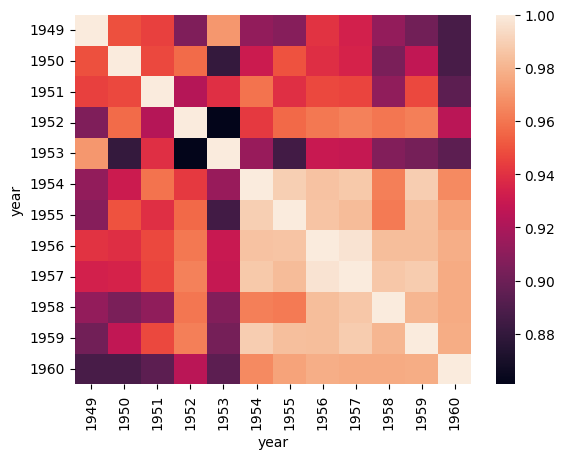

In [319]:
matcorr = df.corr()
sns.heatmap(matcorr);

## Agrupamientos con el método GroupBy

In [320]:
informacion = {'Delegación':['A Coruña','A Coruña','Santiago','Santiago','Vigo','Vigo'],
                 'Vendedor':['Iria','Miguel','Ana','Carlos','María','Alex'],
                   'Ventas':[200,120,340,124,243,350]}
df = pd.DataFrame(informacion)
df

,Delegación,Vendedor,Ventas
0,A Coruña,Iria,200
1,A Coruña,Miguel,120
2,Santiago,Ana,340
3,Santiago,Carlos,124
4,Vigo,María,243
5,Vigo,Alex,350


In [321]:
porDelegacion = df.groupby('Delegación') # se define el grupo (el grupo no es un dataframe)
print("\nPromedio de ventas por delegación: agrupando por la columna 'Delegación'\n",'-'*80, sep='')

print(porDelegacion.mean(numeric_only=True)) # numeric_only: para que descarte las columnas no numéricas
print("\nVentas totales por delegación: agrupando por la columna 'Delegación'\n",'-'*75, sep='')
print(porDelegacion.sum(numeric_only=True))
print("\nTipo devuelto por groupby:" + str(type(porDelegacion))) # se podría convertir en dataframe así: pd.DataFrame(porDelegacion)


Promedio de ventas por delegación: agrupando por la columna 'Delegación'
--------------------------------------------------------------------------------
            Ventas
Delegación        
A Coruña     160.0
Santiago     232.0
Vigo         296.5

Ventas totales por delegación: agrupando por la columna 'Delegación'
---------------------------------------------------------------------------
            Ventas
Delegación        
A Coruña       320
Santiago       464
Vigo           593

Tipo devuelto por groupby:<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


#### Uso de grupos con `describe` y selección por etiqueta (`loc`)

In [322]:
sVigo = df.groupby('Delegación').describe().loc['Vigo'] # es una pandas.Series
print("\nEstadísticos de 'describe' para 'Vigo' en una línea)\n",'-'*65, sep='')
print(pd.DataFrame(sVigo).transpose())

print("\n\nCombinación de grupos, describe e indexado por etiquetas:\n",'-'*68, sep='')
print(df.groupby('Delegación').describe().loc[['A Coruña', 'Santiago']])  # genera un dataframe


Estadísticos de 'describe' para 'Vigo' en una línea)
-----------------------------------------------------------------
     Ventas                                                       
      count   mean        std    min     25%    50%     75%    max
Vigo    2.0  296.5  75.660426  243.0  269.75  296.5  323.25  350.0


Combinación de grupos, describe e indexado por etiquetas:
--------------------------------------------------------------------
           Ventas                                                      
            count   mean         std    min    25%    50%    75%    max
Delegación                                                             
A Coruña      2.0  160.0   56.568542  120.0  140.0  160.0  180.0  200.0
Santiago      2.0  232.0  152.735065  124.0  178.0  232.0  286.0  340.0


## Combinaciones
Dataframes de ejemplo

In [323]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                         index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                         index=[8,9,10,11])

print("\nDataFrame nº 1\n",'-'*30, sep='')
print(df1)
print("\nDataFrame nº 2\n",'-'*30, sep='')
print(df2)
print("\nDataFrame nº 3\n",'-'*30, sep='')
print(df3)


DataFrame nº 1
------------------------------
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3

DataFrame nº 2
------------------------------
    A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7

DataFrame nº 3
------------------------------
      A    B    C    D
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11


### Concatenación

In [324]:
dfc1 = pd.concat([df1,df2,df3], axis=0)
print("\nConcatenación por filas\n",'-'*30, sep='')
print(dfc1)

dfc2 = pd.concat([df1,df2,df3], axis=1)
print("\nConcatenación por columnas\n",'-'*60, sep='')
print(dfc2)

dfc2.fillna(value=0, inplace=True) # inplace=True -> cambia df, en lugar de devolver resultado
print("\nReeplazo de valores ausentes por 0\n",'-'*60, sep='')
print(dfc2)


Concatenación por filas
------------------------------
      A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11

Concatenación por columnas
------------------------------------------------------------
      A    B    C    D    A    B    C    D    A    B    C    D
0    A0   B0   C0   D0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1    A1   B1   C1   D1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2    A2   B2   C2   D2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3    A3   B3   C3   D3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4   NaN  NaN  NaN  NaN   A4   B4   C4   D4  NaN  NaN  NaN  NaN
5   NaN  NaN  NaN  NaN   A5   B5   C5   D5  NaN  NaN  NaN  NaN
6   NaN  NaN  NaN  NaN   A6   B6   C6   D6  NaN  NaN  NaN  NaN
7   NaN  NaN  NaN  NaN   A7   B7   C7   D7  NaN  NaN

### Uniendo con una clave común
El método **merge** permite unir de forma similar a la instrucción join de SQL.

In [325]:
izq = pd.DataFrame({'común': ['K0', 'K1', 'K2', 'K3'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})

dcho = pd.DataFrame({'común': ['K0', 'K1', 'K2', 'K3'],
                         'C': ['C0', 'C1', 'C2', 'C3'],
                         'D': ['D0', 'D1', 'D2', 'D3']})

print("\nDataFrame 'izq'\n" + '-'*30)
print(izq)

print("\nDataFrame 'dcho'\n" + '-'*30)
print(dcho)


DataFrame 'izq'
------------------------------
  común   A   B
0    K0  A0  B0
1    K1  A1  B1
2    K2  A2  B2
3    K3  A3  B3

DataFrame 'dcho'
------------------------------
  común   C   D
0    K0  C0  D0
1    K1  C1  D1
2    K2  C2  D2
3    K3  C3  D3


#### El método `merge` puede actuar como el 'join' en SQL

In [326]:
m = pd.merge(izq, dcho, how='inner', on='común')
print("\nTras la unión\n" + '-'*30)
print(m)


Tras la unión
------------------------------
  común   A   B   C   D
0    K0  A0  B0  C0  D0
1    K1  A1  B1  C1  D1
2    K2  A2  B2  C2  D2
3    K3  A3  B3  C3  D3


#### Usando el método `merge` con un conjunto de claves

In [327]:
izq = pd.DataFrame({'clave1': ['K0', 'K0', 'K1', 'K2'],
                    'clave2': ['K0', 'K1', 'K0', 'K1'],
                         'A': ['A0', 'A1', 'A2', 'A3'],
                         'B': ['B0', 'B1', 'B2', 'B3']})

dcho = pd.DataFrame({'clave1': ['K0', 'K1', 'K1', 'K2'],
                     'clave2': ['K0', 'K0', 'K0', 'K0'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})

print("\nDataFrame 'izq'\n"  + '-'*30)
print(izq)

print("\nDataFrame 'dcho'\n" + '-'*30)
print(dcho)


DataFrame 'izq'
------------------------------
  clave1 clave2   A   B
0     K0     K0  A0  B0
1     K0     K1  A1  B1
2     K1     K0  A2  B2
3     K2     K1  A3  B3

DataFrame 'dcho'
------------------------------
  clave1 clave2   C   D
0     K0     K0  C0  D0
1     K1     K0  C1  D1
2     K1     K0  C2  D2
3     K2     K0  C3  D3


#### `merge` sobre dos claves compartidas ('clave1' y 'clave2'):

In [328]:
pd.merge(izq, dcho, on=['clave1', 'clave2'])

,clave1,clave2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


#### `merge` externo sobre dos claves compartidas ('clave1' y 'clave2'):

In [329]:
pd.merge(izq, dcho, how='outer', on=['clave1', 'clave2'])

,clave1,clave2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


#### `merge` izquierdo sobre dos claves compartidas ('clave1' y 'clave2'):

In [330]:
pd.merge(izq, dcho, how='left', on=['clave1', 'clave2'])

,clave1,clave2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


#### `merge` derecho sobre dos claves compartidas ('clave1' y 'clave2'):

In [331]:
pd.merge(izq, dcho, how='right',on=['clave1', 'clave2'])

,clave1,clave2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


#### El método join
Permite combinar las columnas de dos DataFrames indexados. El de la izquierda puede combinarse por columnas o por índice. El de la derecha, sólo por su índice.

In [332]:
izq = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                    'B': ['B0', 'B1', 'B2']},
                   index=['K0', 'K1', 'K2'])

dcho = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                     'D': ['D0', 'D2', 'D3']},
                    index=['K0', 'K2', 'K3'])
print(izq,"\n")
print(dcho)

     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2 

     C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3


In [333]:
izq.join(dcho) # por defecto, how="left"

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [334]:
izq.join(dcho, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


## Operaciones varias

In [335]:
df = pd.DataFrame({'col1':[1,   2,   3,   4,   5,   6,   7,   8,   9,   10],
                   'col2':[444, 555, 666, 444, 333, 222, 666, 777, 666, 555],
                   'col3':'aaa bb c dd eeee fff gg h iii j'.split()}) # split convierte str en lista de strs
print(df)

   col1  col2  col3
0     1   444   aaa
1     2   555    bb
2     3   666     c
3     4   444    dd
4     5   333  eeee
5     6   222   fff
6     7   666    gg
7     8   777     h
8     9   666   iii
9    10   555     j


### Los métodos `unique()` y `nunique()`

Para columnas de DataFrames y Series

In [336]:
print("\nValores únicos en 'col2':\n" + '-'*40) # El método 'unique' solo vale para pd.Series
print(df['col2'].unique()) # devuelve los valores únicos (devuelve array)

print("\nNúmero de valores únicos en 'col2':\n" + '-'*45)
print(df['col2'].nunique()) # devuelve cuántos valores únicos (por defecto no cuenta NaN )


Valores únicos en 'col2':
----------------------------------------
[444 555 666 333 222 777]

Número de valores únicos en 'col2':
---------------------------------------------
6


###  El método `value_counts()`

Devuelve una serie con cada valor único y su recuento de una serie o una columna de DataFrame.

In [337]:
print("\nTabla de valores únicos en 'col2'\n" + '-'*40)
t1 = df['col2'].value_counts()
print(t1)


Tabla de valores únicos en 'col2'
----------------------------------------
666    3
444    2
555    2
333    1
222    1
777    1
Name: col2, dtype: int64


### Applicar funciones
El método **'apply'** permite aplicar cualquier función.

In [338]:
def fprueba(x):
    if (x>500):
        return (10*np.log10(x))
    else:
        return (x/10)

In [339]:
df['FuncAplicada'] = df['col2'].apply(fprueba)
print(df)

   col1  col2  col3  FuncAplicada
0     1   444   aaa     44.400000
1     2   555    bb     27.442930
2     3   666     c     28.234742
3     4   444    dd     44.400000
4     5   333  eeee     33.300000
5     6   222   fff     22.200000
6     7   666    gg     28.234742
7     8   777     h     28.904210
8     9   666   iii     28.234742
9    10   555     j     27.442930


El método **'apply'** también permite aplicar funciones propias de Python

In [340]:
df['LongitudCol3']= df['col3'].apply(len)
print(df)

   col1  col2  col3  FuncAplicada  LongitudCol3
0     1   444   aaa     44.400000             3
1     2   555    bb     27.442930             2
2     3   666     c     28.234742             1
3     4   444    dd     44.400000             2
4     5   333  eeee     33.300000             4
5     6   222   fff     22.200000             3
6     7   666    gg     28.234742             2
7     8   777     h     28.904210             1
8     9   666   iii     28.234742             3
9    10   555     j     27.442930             1


En ocasiones es útil usar **'apply'** con expresiones lambda

In [341]:
#def fun(x):
#  return np.sqrt(x)

df['FuncAplicada'].apply(lambda x: np.sqrt(x))

0    6.663332
1    5.238600
2    5.313637
3    6.663332
4    5.770615
5    4.711688
6    5.313637
7    5.376264
8    5.313637
9    5.238600
Name: FuncAplicada, dtype: float64

Aplicación de funciones estadísticas estándar directamente sobre columnas

In [342]:
print("Suma de la columna 'FuncAplicada':               ", df['FuncAplicada'].sum())
print("Promedio de la columna 'FuncAplicada':           ", df['FuncAplicada'].mean())
print("Desviación estándar de la columna 'FuncAplicada':", df['FuncAplicada'].std())
print("Mínimo y máximo de la columna 'FuncAplicada':    ", df['FuncAplicada'].min(),"y",df['FuncAplicada'].max())

Suma de la columna 'FuncAplicada':                312.7942967255717
Promedio de la columna 'FuncAplicada':            31.27942967255717
Desviación estándar de la columna 'FuncAplicada': 7.4065059423607895
Mínimo y máximo de la columna 'FuncAplicada':     22.2 y 44.4


### Listado de columnas

In [343]:
print("\nNombre de las columnas:\n",'-'*60, sep='')
lista_cols = list(df.columns) # conversión en lista
print(lista_cols)


Nombre de las columnas:
------------------------------------------------------------
['col1', 'col2', 'col3', 'FuncAplicada', 'LongitudCol3']


### Borrado usando la instrucción `del`
Modifica el propio DataFrame, a diferencia del método `drop`

In [344]:
print(df)
print("\nSe elimina la última columna:\n",'-'*50, sep='')
del df['LongitudCol3']
df

   col1  col2  col3  FuncAplicada  LongitudCol3
0     1   444   aaa     44.400000             3
1     2   555    bb     27.442930             2
2     3   666     c     28.234742             1
3     4   444    dd     44.400000             2
4     5   333  eeee     33.300000             4
5     6   222   fff     22.200000             3
6     7   666    gg     28.234742             2
7     8   777     h     28.904210             1
8     9   666   iii     28.234742             3
9    10   555     j     27.442930             1

Se elimina la última columna:
--------------------------------------------------


,col1,col2,col3,FuncAplicada
0,1,444,aaa,44.400000
1,2,555,bb,27.442930
2,3,666,c,28.234742
3,4,444,dd,44.400000
4,5,333,eeee,33.300000
5,6,222,fff,22.200000
6,7,666,gg,28.234742
7,8,777,h,28.904210
8,9,666,iii,28.234742
9,10,555,j,27.442930


### Ordenación

In [345]:
df.sort_values(by='col2') # inplace=False por defecto

,col1,col2,col3,FuncAplicada
5,6,222,fff,22.200000
4,5,333,eeee,33.300000
0,1,444,aaa,44.400000
3,4,444,dd,44.400000
1,2,555,bb,27.442930
9,10,555,j,27.442930
2,3,666,c,28.234742
6,7,666,gg,28.234742
8,9,666,iii,28.234742
7,8,777,h,28.904210


In [346]:
df.sort_values(by='FuncAplicada',ascending=False) # orden decreciente

,col1,col2,col3,FuncAplicada
0,1,444,aaa,44.400000
3,4,444,dd,44.400000
4,5,333,eeee,33.300000
7,8,777,h,28.904210
2,3,666,c,28.234742
6,7,666,gg,28.234742
8,9,666,iii,28.234742
1,2,555,bb,27.442930
9,10,555,j,27.442930
5,6,222,fff,22.200000


#### Valores nulos: búsqueda y comprobación

In [347]:
df = pd.DataFrame({'col1':[1,      2,     3,     np.nan],
                   'col2':[np.nan, None,   666,   444],
                   'col3':['abc',  'def', 'ghi', 'xyz']})
# Los None se convierten automáticamene a NaN
df

,col1,col2,col3
0,1.0,NaN,abc
1,2.0,NaN,def
2,3.0,666.0,ghi
3,NaN,444.0,xyz


In [348]:
df.isnull()

,col1,col2,col3
0,False,True,False
1,False,True,False
2,False,False,False
3,True,False,False


In [349]:
df.fillna('-')

,col1,col2,col3
0,1.0,-,abc
1,2.0,-,def
2,3.0,666.0,ghi
3,-,444.0,xyz


### El método info()

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    3 non-null      float64
 1   col2    2 non-null      float64
 2   col3    4 non-null      object 
dtypes: float64(2), object(1)
memory usage: 224.0+ bytes


### Coversión de texto a *datetime*

In [351]:
infoConFechas = {'FechasTxt':['01-11-2020','12-12-2020','25-01-2021'],
                 'Ventas':   [ 123.23,      332.12,      553.32]}
dff = pd.DataFrame(infoConFechas)

# Creamos columna con fecha en formato datetime, a partir de fecha en modo texto
dff['Fecha'] = pd.to_datetime(dff["FechasTxt"], format = '%d-%m-%Y')

# Creamos columna con mes (número)
dff['Mes']   = pd.to_datetime(dff["FechasTxt"], format = '%d-%m-%Y').dt.month

# Eliminamos columna incial de fechas en modo texto
dff.drop(columns=['FechasTxt'], inplace=True)
dff

,Ventas,Fecha,Mes
0,123.23,2020-11-01,11
1,332.12,2020-12-12,12
2,553.32,2021-01-25,1


## Renombrar columnas

In [352]:
dff.rename(columns={'Ventas':'Sales', 'Fecha':'Date', 'Mes':'Month'}, inplace=True)
dff

,Sales,Date,Month
0,123.23,2020-11-01,11
1,332.12,2020-12-12,12
2,553.32,2021-01-25,1


## Reemplazar valores

In [353]:
dff2 = pd.DataFrame({'col1':[ 1,      2,     3,     8],
                     'col2':['A',    'B',   'A',   'C'],
                     'col3':['X',    'Z',   'Y',   'X']})

print(dff2,'\n')

# usando 'replace'
dff2[['col2']] = dff2[['col2']].replace({'A': 0, 'B': 1, 'C': 2})

# usando 'map' y diccionarios:
dff2['col3']= dff2['col3'].map({'X':0, 'Y':1, 'Z':2})

print(dff2)

   col1 col2 col3
0     1    A    X
1     2    B    Z
2     3    A    Y
3     8    C    X 

   col1  col2  col3
0     1     0     0
1     2     1     2
2     3     0     1
3     8     2     0


## Guardar y leer DataFrames en ficheros

In [354]:
df = pd.DataFrame({'col1':[1,2,3,np.nan],
                   'col2':[223,555,666,444],
                   'col3':['abc','def','ghi','xyz']})
df

,col1,col2,col3
0,1.0,223,abc
1,2.0,555,def
2,3.0,666,ghi
3,NaN,444,xyz


### Escritura y lectura a csv (valores separados por comas)

##### Montar GDrive para acceder a sus carpetas y definir el directorio de **guardado**

In [355]:
# Versión para Google Colab
from google.colab import drive  # montar Google Drive
drive.mount('/content/gdrive')
DIRECTORIO = '/content/gdrive/MyDrive/Colab Notebooks/CursoDL/temp/' #  directorio de trabajo

# Versión para Windows
# DIRECTORIO = 'c:/temp/'

Mounted at /content/gdrive


##### Guardar y cargar el *DataFrame*

In [356]:
df.to_csv(DIRECTORIO + 'fichero.csv')
df2 = pd.read_csv(DIRECTORIO + 'fichero.csv', index_col=0)
df2

,col1,col2,col3
0,1.0,223,abc
1,2.0,555,def
2,3.0,666,ghi
3,NaN,444,xyz


**Sin indicar columna para el índice**

In [357]:
df2=pd.read_csv(DIRECTORIO + 'fichero.csv')
df2

,Unnamed: 0,col1,col2,col3
0,0,1.0,223,abc
1,1,2.0,555,def
2,2,3.0,666,ghi
3,3,NaN,444,xyz


### Escritura y lectura a Excel
Es necesario tener instalado el paquete xlrd `pip install xlrd`<br>
Para trabajar con formatos Excel 95 a 2003 hay que instalar el paquete xlwt<br>
Para trabajar con formato Excel 2010 (xlsx) también es necesario el paquete openpyxl

In [358]:
print(df,"\n")
df.to_excel(DIRECTORIO + 'fichero2.xlsx')
df2 = pd.read_excel(DIRECTORIO + 'fichero2.xlsx');
df2

   col1  col2 col3
0   1.0   223  abc
1   2.0   555  def
2   3.0   666  ghi
3   NaN   444  xyz 



,Unnamed: 0,col1,col2,col3
0,0,1.0,223,abc
1,1,2.0,555,def
2,2,3.0,666,ghi
3,3,NaN,444,xyz


## Visualización propia de Pandas
Usa *matplotlib* internamente, sin necesidad de importarla, para hacer las visualizaciones

### Histograma

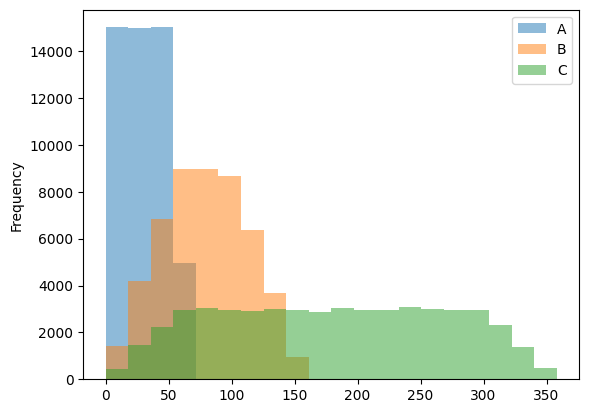

In [359]:
df = pd.DataFrame(np.random.randint(0, 60, 50000), columns = ['A'])
df['B'] = df['A'] + np.random.randint(0, 100, 50000)
df['C'] = df['A'] + np.random.randint(0, 300, 50000)
df.plot.hist(bins=20, alpha=0.5);

**Histograma con lista de columnas y tamaño de figura.**

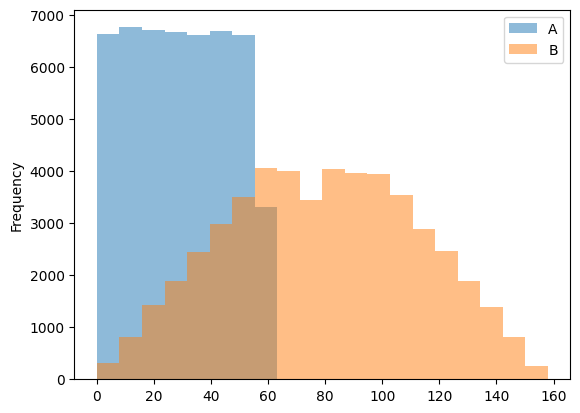

In [360]:
df[['A','B']].plot.hist(bins=20, alpha=0.5);

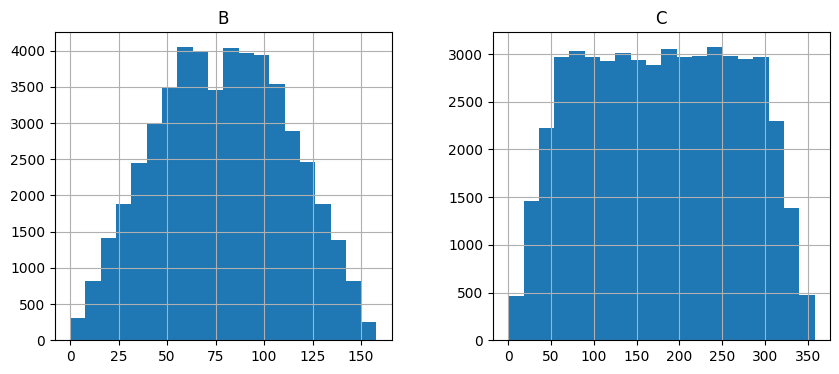

In [361]:
df.hist(column=['B','C'], bins=20, figsize=(10,4));

**Histograma con plot genérico de Pandas**

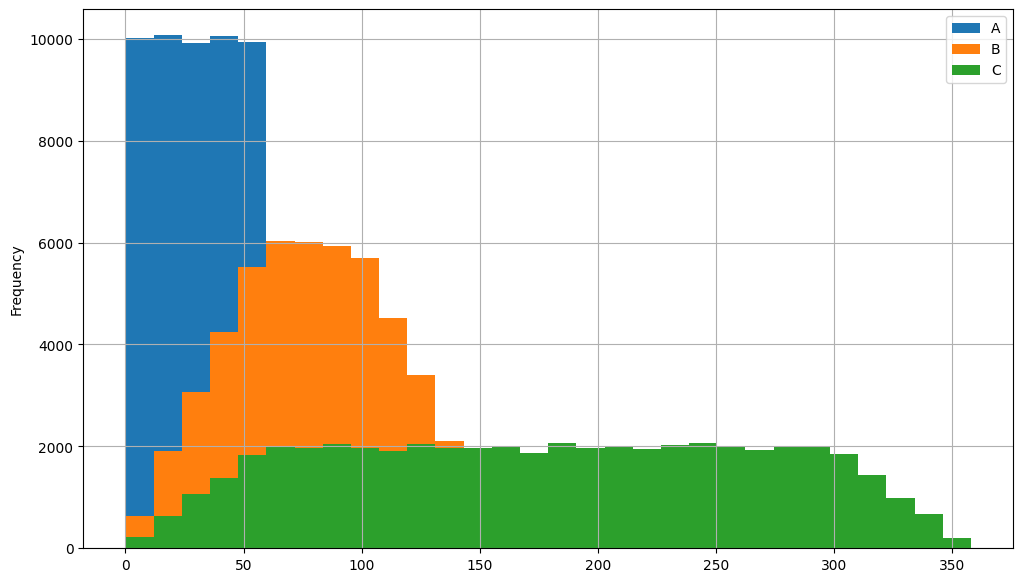

In [362]:
df.plot(kind='hist', bins=30, grid=True, figsize=(12,7));

### Gráficas de área

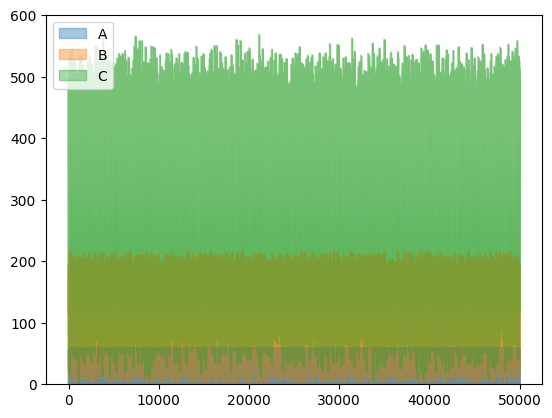

In [363]:
df.plot.area(alpha=0.4);

### Gráficas de barras

,Delegación,Vendedor,Id,Ventas,Horas
0,A Coruña,Iria,0,200,80
1,A Coruña,Miguel,1,120,60
2,Santiago,Ana,2,340,192
3,Santiago,Carlos,3,124,96
4,Vigo,María,4,243,140
5,Vigo,Alex,5,350,276


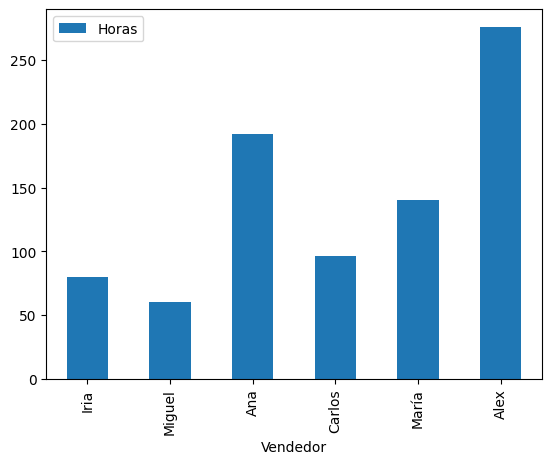

In [364]:
informacion = {'Delegación':['A Coruña','A Coruña','Santiago','Santiago','Vigo','Vigo'],
                 'Vendedor':['Iria','Miguel','Ana','Carlos','María','Alex'],
                       'Id':[0,1,2,3,4,5],
                   'Ventas':[200,120,340,124,243,350],
                    'Horas':[80,60,192,96,140,276]}
df = pd.DataFrame(informacion)
ax = df.plot.bar(x='Vendedor', y='Horas')
df


**Múltiple sin apilamiento**

,Delegación,Vendedor,Id,Ventas,Horas
0,A Coruña,Iria,0,200,80
1,A Coruña,Miguel,1,120,60
2,Santiago,Ana,2,340,192
3,Santiago,Carlos,3,124,96
4,Vigo,María,4,243,140
5,Vigo,Alex,5,350,276


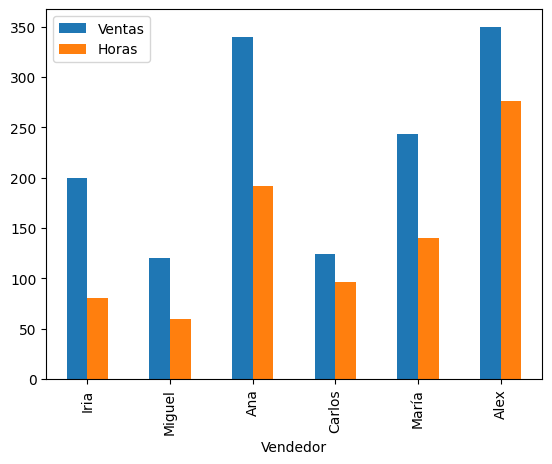

In [365]:
df.plot(x='Vendedor',y=['Ventas','Horas'],kind="bar"); # si parámetro 'y' muestra todos las cols numéricas
df

**Gráfico de barras múltiple con apilamiento**

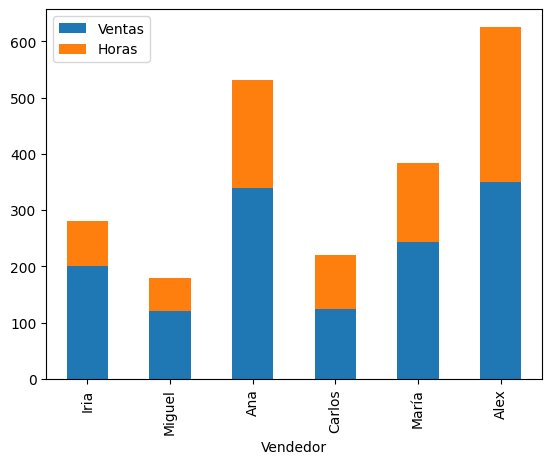

In [366]:
df.plot(x='Vendedor',y=['Ventas','Horas'],kind="bar", stacked=True);

### Gráficas de línea

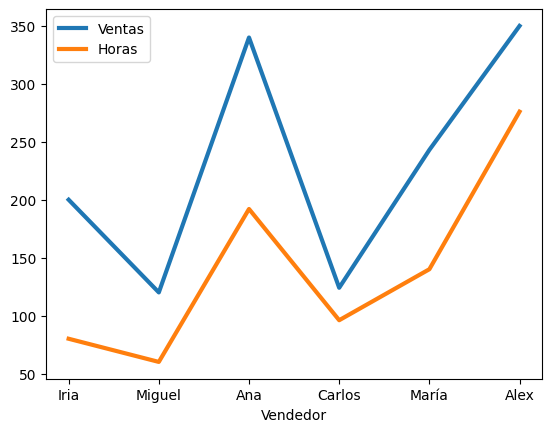

In [367]:
df.plot.line(x='Vendedor',y=['Ventas','Horas'], lw=3); # lw: ancho de línea; ejemplo solo una gráfica: y='Ventas'

### Diagrama de dispersión (*scatter plot*)

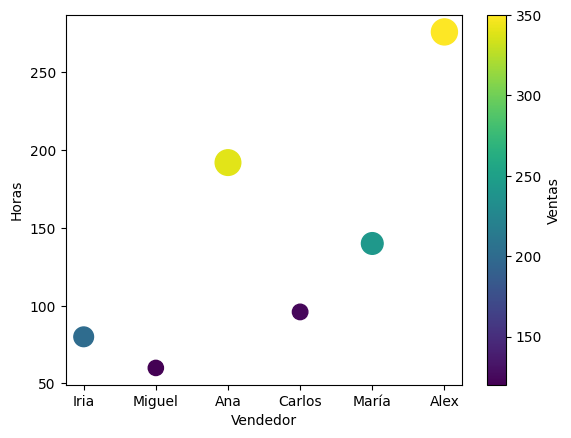

In [368]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots() # estas dos primeras líneas son necesarias para que jupyter muestre los valores del eje x

df.plot.scatter(x='Vendedor', y='Horas', c='Ventas', s=df['Ventas'], colormap='viridis', ax=ax);

### Diagrama de caja (*Boxplot*)

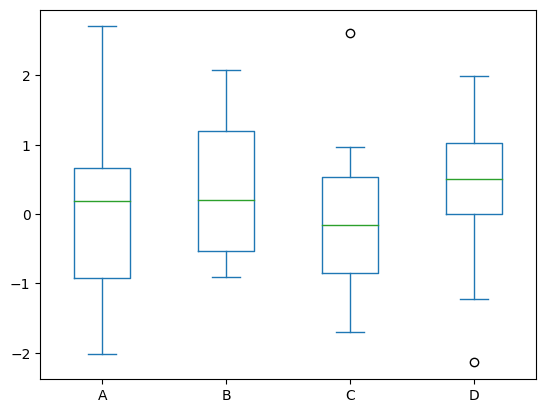

In [369]:
# Muestra los cuatro cuartiles y la mediana
np.random.seed(101)
data = np.random.randn(25, 4)
df = pd.DataFrame(data, columns=['A','B','C','D'])
ax = df.plot.box()
# círculos para valores atípicos (outliers)